## Расчётная работа по Теории Вероятности. Вариант 19<p>Задание 1</p>

### Импорт библиотек
- NumPy - библиотека для работы с массивами, матрицами. Предоставляет статистические функции.
- SciPy - библиотека предоставляет статистические функции и поддерживает построение графиков.
- scipy.integrate для интегрирования
- scipy.stats.norm для анализа нормального распредления
- scipy.optimize.norm для оптимизации функции (минимизации)
- MatPlotLib - это пакет для визуализации данных (для построения графиков).
- Regex(re) - поддерживает использование регулярных выражений.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import re

from scipy import stats
from scipy import optimize

### Константы
n = 450 - объём выборки
</br>$a_X$ = 2.35 - математическое ожидание
</br>$\sigma^2_X$ = 6.4 - дисперсия
</br>$\gamma$ = 0.95 - доверительная вероятность
</br>$\alpha$ = 0.005 - уровень значимости

In [10]:
n = 450
MX = 2.35
DX = 6.4
S = np.sqrt(DX) # Среднее квадратичное отклонение
SEED = 0        # Начальное значение для получения предсказуемой последовательности случайных чисел

$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-a)^{2}}{2\sigma^{2}}}$ - Функция нормального распределения случайной величины (1)</br></br>
Сгенерируем выборку и выведем первые 10 значений случайной величины:

In [11]:
x: np.ndarray = stats.norm.rvs(loc=MX, scale=S, size=n, random_state=SEED)
print(f"{str(x[:10])[1:-1]}...")

 6.81273866  3.36232656  4.82603301  8.0190612   7.07458953 -0.12233921
  4.7535547   1.96709319  2.08887466  3.38874118...


### 1.1 Построить гистограмму распределения</br> и изобразить её графически одновременно с теоретической плотностью вероятностей.

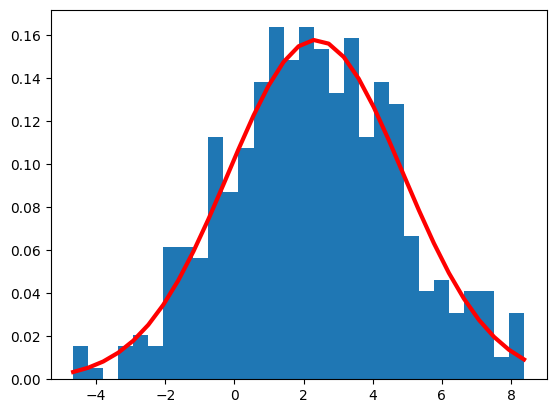

In [12]:
_, intervals_x, _ = plt.hist(x, 30, density=True) # Построение гистограммы по имеющимся значениям X 

theoretic_y = 1 / (S * np.sqrt(2 * np.pi)) * np.exp(- (intervals_x - MX)**2 / (2 * S**2)) # Вычисление функции нормального распределения по формуле (1)

plt.plot(intervals_x, theoretic_y, linewidth=3, color='r')
plt.show()

### 1.2 Вычислить выборочное среднее и выборочную дисперсию</br>
Выборочное среднее: 
$\bar{x} = \frac{1}{n}\sum_{i=0}^{n-1}x_{i}$

In [13]:
average = x.sum() / n

Выборочная дисперсия: $S^2 = \frac{1}{n}\sum_{i=0}^{n-1}(x_{i}-\bar{x})^2$

In [14]:
sumT = 0
for i in range(n):
    sumT += (x[i] - average) ** 2

print(f"Выборочное среднее: {average}\nВыборочная дисперсия: {sumT / n}")

Выборочное среднее: 2.2773128574414394
Выборочная дисперсия: 6.160497636072116


### 1.3 Найти оценки математического ожидания и дисперсии </br>методом максимального правдоподобия. Указать несмещённую оценку дисперсии.

Функция правдоподобия: $L(x_1,...,x_n; \theta) = f(x_1; \theta) * ... * f(x_n; \theta)$ </br>
Оценка максимального правдоподобия: $L(x_1,...,x_n;\hat{\theta}) = maxL(x_1,...,x_n; \theta)$ </br></br>
Для мат.ожидания:

In [15]:
def plausibility(x, params):
    return stats.norm.logpdf(x, loc=params[0], scale=params[1]).sum()

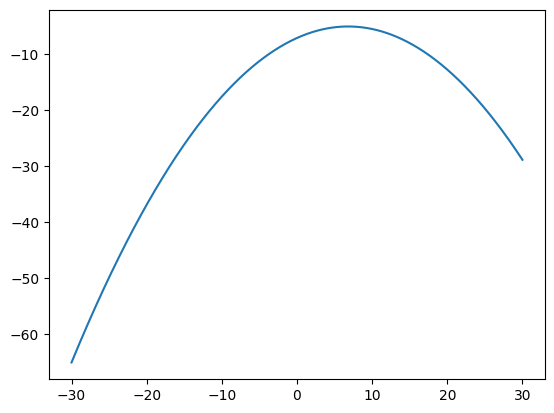

In [17]:
x_axis = np.linspace(-30, 30, 1000)
y_axis = [plausibility([val, S], x) for val in np.linspace(-30, 30, 1000)]
plt.plot(x_axis, y_axis)
plt.show()

Для дисперсии:

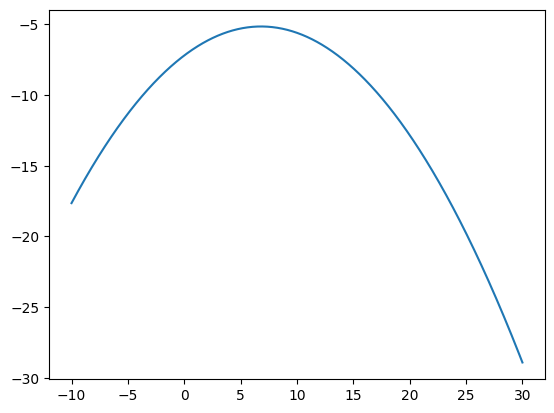

In [27]:
x_axis = np.linspace(-10, 30, 1000)
y_axis = [plausibility([MX, val], x) for val in np.linspace(-10, 30, 1000)]
plt.plot(x_axis, y_axis)
plt.show()

Инверсируем функции для нахождения минимального значения с помощью функции минимизации

In [31]:
def negative_MX(MX):
    return -1 * plausibility([MX, S], x)

def negative_S(S):
    return -1 * plausibility([MX, S], x)

Найдём оценки мат. ожидания и дисперсии:

In [32]:
est_MX = optimize.minimize(negative_MX, 30).x
est_S = optimize.minimize(negative_S, 30).x
print(f"Оценка мат. ожидания: {str(est_MX)[1:-1]}\nОценка дисперсии: {str(est_S ** 2)[1:-1]}")

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.